# **Part - 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time
import random
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation

In [ ]:
# Path to Datasets
# Training Path
train_benign_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Training/benign"
train_malignant_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Training/malignant"
train_normal_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Training/normal"

# Validation Path
valid_benign_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Validation/benign"
valid_malignant_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Validation/malignant"
valid_normal_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Validation/normal"

# Testing Path
test_benign_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Testing/benign"
test_malignant_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Testing/malignant"
test_normal_path = "/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Testing/normal"

In [ ]:
# Making Directory of Images
# Training Images
train_benign_image = os.listdir(train_benign_path)
train_malignant_image = os.listdir(train_malignant_path)
train_normal_image = os.listdir(train_normal_path)

#Validation Images
valid_benign_image = os.listdir(valid_benign_path)
valid_malignant_image = os.listdir(valid_malignant_path)
valid_normal_image = os.listdir(valid_normal_path)

#Testing Images
test_benign_image = os.listdir(test_benign_path)
test_malignant_image = os.listdir(test_malignant_path)
test_normal_image = os.listdir(test_normal_path)

In [ ]:
# Printing Numbers of Images in each Dataset
print("Number of Benign Images in Training = ",len(train_benign_image))
print("Number of Malignant Images in Training = ",len(train_malignant_image))
print("Number of Normal Images in Training = ",len(train_normal_image))

print('\n')
print("Number of Benign Images in Validation = ",len(valid_benign_image))
print("Number of Malignant Images in Validation = ",len(valid_malignant_image))
print("Number of Normal Images in Validation = ",len(valid_normal_image))

print('\n')
print("Number of Benign Images in Testing = ",len(test_benign_image))
print("Number of Malignant Images in Testing = ",len(test_malignant_image))
print("Number of Normal Images in Testing = ",len(test_normal_image))

Number of Benign Images in Training =  537
Number of Malignant Images in Training =  537
Number of Normal Images in Training =  537


Number of Benign Images in Validation =  153
Number of Malignant Images in Validation =  153
Number of Normal Images in Validation =  153


Number of Benign Images in Testing =  78
Number of Malignant Images in Testing =  78
Number of Normal Images in Testing =  78


# **Part - 2**

Training Data

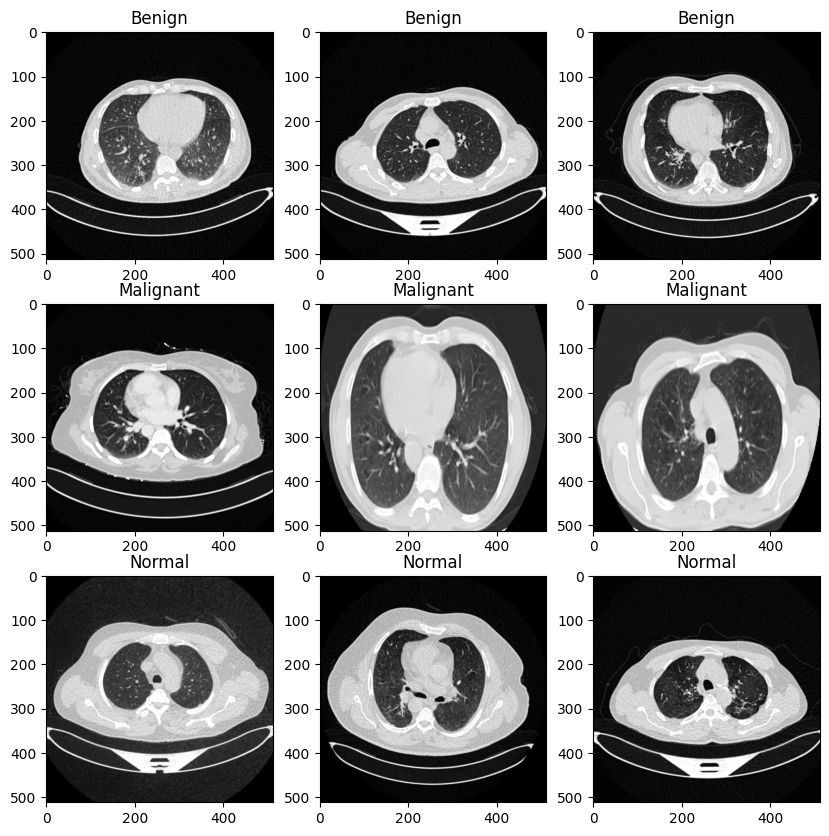

In [ ]:
m=0
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(train_benign_path + '/' + random.choice(train_benign_image))
  axes[m].imshow(img)
  axes[m].set_title("Benign")
  m=m+1

for i in range(3):
  img = plt.imread(train_malignant_path + '/' + random.choice(train_malignant_image))
  axes[m].imshow(img)
  axes[m].set_title("Malignant")
  m=m+1

for i in range(3):
  img = plt.imread(train_normal_path + '/' + random.choice(train_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

Validation Data

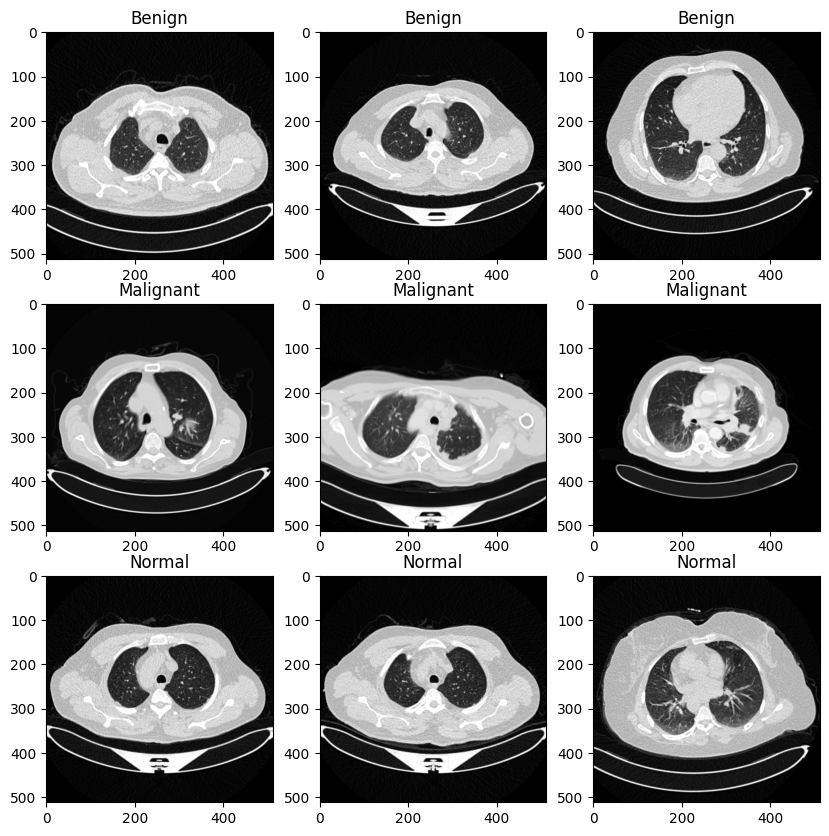

In [ ]:
m=0
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(valid_benign_path + '/' + random.choice(valid_benign_image))
  axes[m].imshow(img)
  axes[m].set_title("Benign")
  m=m+1

for i in range(3):
  img = plt.imread(valid_malignant_path + '/' + random.choice(valid_malignant_image))
  axes[m].imshow(img)
  axes[m].set_title("Malignant")
  m=m+1

for i in range(3):
  img = plt.imread(valid_normal_path + '/' + random.choice(valid_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

Test Data

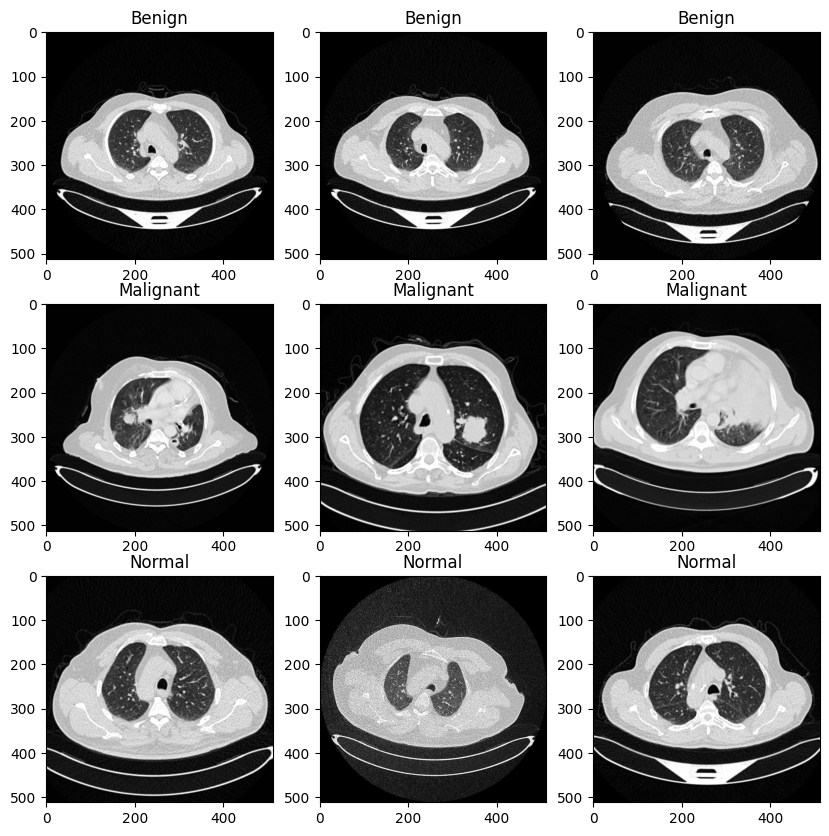

In [ ]:
m=0
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(test_benign_path + '/' + random.choice(test_benign_image))
  axes[m].imshow(img)
  axes[m].set_title("Benign")
  m=m+1

for i in range(3):
  img = plt.imread(valid_malignant_path + '/' + random.choice(valid_malignant_image))
  axes[m].imshow(img)
  axes[m].set_title("Malignant")
  m=m+1

for i in range(3):
  img = plt.imread(test_normal_path + '/' + random.choice(test_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

# **Part - 3**

Model

In [ ]:
input_shape = (512, 512, 3)
model = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=input_shape)

# Design new model
x = model.output
x = tf.keras.layers.GlobalMaxPool2D()(x)

# Additional layers
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
preds = tf.keras.layers.Dense(3, activation = 'softmax')(x)  # This layer will have output. So It will have 3 neuron
efficient_model=tf.keras.models.Model(inputs = model.input, outputs = preds)
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=1e-4,
    clipnorm=1.0,
)
efficient_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
efficient_model.summary()

52606240/52606240 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 512, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 512, 512, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)          

In [ ]:
for i,layer in enumerate(efficient_model.layers):
  print(i,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block1b_project_conv
10 block1b_project_bn
11 block1b_project_activation
12 block1b_drop
13 block1b_add
14 block2a_expand_conv
15 block2a_expand_bn
16 block2a_expand_activation
17 block2a_project_conv
18 block2a_project_bn
19 block2b_expand_conv
20 block2b_expand_bn
21 block2b_expand_activation
22 block2b_project_conv
23 block2b_project_bn
24 block2b_drop
25 block2b_add
26 block2c_expand_conv
27 block2c_expand_bn
28 block2c_expand_activation
29 block2c_project_conv
30 block2c_project_bn
31 block2c_drop
32 block2c_add
33 block3a_expand_conv
34 block3a_expand_bn
35 block3a_expand_activation
36 block3a_project_conv
37 block3a_project_bn
38 block3b_expand_conv
39 block3b_expand_bn
40 block3b_expand_activation
41 block3b_project_conv
42 block3b_project_bn
43 block3b_drop
44 block3b_add
45 block3c_expand_conv
46 block3c_expand_bn
47 block3c_

In [ ]:
# set layers for training
#layer upto 422 are already trained

for layer in efficient_model.layers[:422]:
  layer.trainable=False
for layer in efficient_model.layers[422:]:
  layer.trainable=True

In [ ]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data=train_generator.flow_from_directory("/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Training/",target_size=(512,512),class_mode='categorical', shuffle=True)

Found 1611 images belonging to 3 classes.


In [ ]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data=valid_generator.flow_from_directory("/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Validation",target_size=(150,150),class_mode='categorical',shuffle=True)

Found 459 images belonging to 3 classes.


In [ ]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Testing",target_size=(224,224),class_mode='categorical',shuffle=True)

Found 234 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [ ]:
valid_data.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [ ]:
test_data.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [ ]:
history = efficient_model.fit(train_data, epochs=5, batch_size=4, validation_data=valid_data)

In [ ]:
final_model=efficient_model.save("efficientNetv2B3.h5")

# **Part - 4**

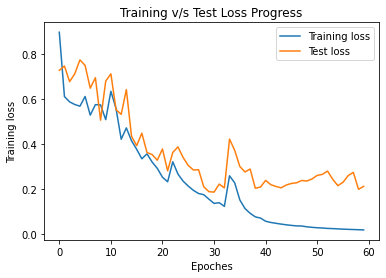

In [ ]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.xlabel("Epoches")
plt.ylabel("Training loss")
plt.title("Training v/s Test Loss Progress")
plt.legend()

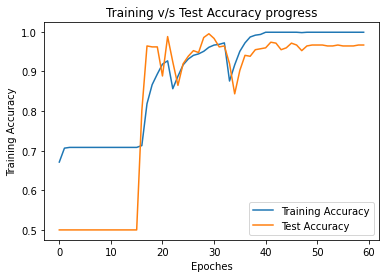

In [ ]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Training Accuracy")
plt.title("Training v/s Test Accuracy progress")
plt.legend()

# **Part - 5**

Training Data

In [ ]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data_1 = train_generator.flow_from_directory("/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Training/",target_size=(512,512),class_mode='categorical', shuffle=False,batch_size=32)

Found 1080 images belonging to 2 classes.


In [ ]:
train_data_1.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Training Data
actual_train_class=train_data_1.classes
actual_valid_class=valid_data.classes
from sklearn.metrics import confusion_matrix
train_data_1.reset()
y_train_pred = efficent_model.predict(train_data_1)
y_train_pred =np.argmax(y_train_pred, axis=1)

34/34 [==============================] - 4s 95ms/step


0.9990740740740741

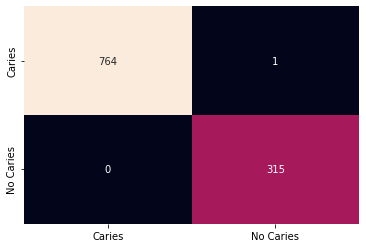

In [ ]:
cm = confusion_matrix(actual_train_class, y_train_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Benign','Malignant','Normal'], yticklabels=['Benign','Malignant','Normal'],cbar=False)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(actual_train_class, y_train_pred)

In [ ]:
print(classification_report(actual_train_class, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       315

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



In [ ]:
print(efficent_model.evaluate(train_data_1))

34/34 [==============================] - 4s 114ms/step - loss: 0.0179 - accuracy: 0.9991
[0.017855612561106682, 0.9990741014480591]


Validation Data

In [ ]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data_1 =valid_generator.flow_from_directory("/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Validation",target_size=(150,150),class_mode='categorical',shuffle=False,batch_size=32)

Found 422 images belonging to 2 classes.


14/14 [==============================] - 2s 122ms/step


<Axes: >

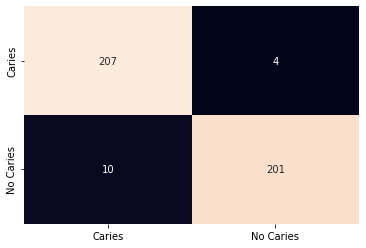

In [ ]:
actual_valid_class=valid_data_1.classes

y_valid_pred = efficent_model.predict(valid_data_1)
y_valid_pred =np.argmax(y_valid_pred, axis=1)

cm = confusion_matrix(actual_valid_class, y_valid_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Benign','Malignant','Normal'], yticklabels=['Benign','Malignant','Normal'],cbar=False)

In [ ]:
print(classification_report(actual_valid_class, y_valid_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       211
           1       0.98      0.95      0.97       211

    accuracy                           0.97       422
   macro avg       0.97      0.97      0.97       422
weighted avg       0.97      0.97      0.97       422



In [ ]:
print(efficent_model.evaluate(valid_data_1))

14/14 [==============================] - 1s 95ms/step - loss: 0.2128 - accuracy: 0.9668
[0.21284672617912292, 0.9668246507644653]


Test Data

In [ ]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data_1 = test_generator.flow_from_directory("/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 1 The IQ-OTHNCCD lung cancer dataset/Final_Dataset/Data/Testing",target_size=(224,224),class_mode='categorical',shuffle=False,batch_size=32)

Found 292 images belonging to 2 classes.


In [ ]:
actual_test_class=test_data_1.classes

y_test_pred = efficent_model.predict(test_data_1)
y_test_pred =np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(actual_test_class, y_test_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Benign','Malignant','Normal'], yticklabels=['Benign','Malignant','Normal'],cbar=False)

In [ ]:
print(classification_report(actual_test_class, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       210
           1       0.95      0.93      0.94        82

    accuracy                           0.97       292
   macro avg       0.96      0.95      0.96       292
weighted avg       0.97      0.97      0.97       292



In [ ]:
print(efficent_model.evaluate(test_data_1))

10/10 [==============================] - 1s 93ms/step - loss: 0.2501 - accuracy: 0.9658
[0.25010403990745544, 0.965753436088562]


# **Part - 6**

Training

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(3,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in train_benign_image:
  if(i<=2):
    test_img=load_img(train_benign_path+'/'+j, target_size=(512,512))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,512,512,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Benign \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

for j in train_malignant_image:
  if(i>2 and i <=5):
    test_img=load_img(train_malignant_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Malignant \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

for j in train_normal_image:
  if(i>5 and i <=8):
    test_img=load_img(train_normal_path+'/'+j, target_size=(512,512))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,512,512,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Normal \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1


fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Validation

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(3,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in valid_benign_image:
  if(i<=2):
    test_img=load_img(vlaid_benign_path+'/'+j, target_size=(512,512))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,512,512,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Benign \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

for j in valid_malignant_image:
  if(i>2 and i <=5):
    test_img=load_img(valid_malignant_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Malignant \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

for j in valid_normal_image:
  if(i>5 and i <=8):
    test_img=load_img(valid_normal_path+'/'+j, target_size=(512,512))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,512,512,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Normal \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1


fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Test

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(3,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in test_benign_image:
  if(i<=2):
    test_img=load_img(test_benign_path+'/'+j, target_size=(512,512))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,512,512,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Benign \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

for j in test_malignant_image:
  if(i>2 and i <=5):
    test_img=load_img(test_malignant_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Malignant \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

for j in test_normal_image:
  if(i>5 and i <=8):
    test_img=load_img(test_normal_path+'/'+j, target_size=(512,512))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,512,512,3)

    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Benign'
    elif pred==1:
      result='Malignant'
    elif pred ==2:
      result='Normal'

    axes[i].set_title("Actual: Normal \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1


fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()